In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras import models , layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential # ANN architecture
from tensorflow.keras.layers import Dense # the layers in the ANN

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### checking the NAN in the data

In [5]:
train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [6]:
X_train = train.drop(['label'], axis=1)
Y_train = train['label']

### Normaliza the data

In [7]:
X_train = X_train.astype('float32')/255
test = test.astype('float32')/255
X_train = X_train.values.reshape((-1,784))
test = test.values.reshape((-1,784))

### Split the data 

In [8]:
X_train,X_test, Y_train, Y_test = train_test_split(X_train,Y_train,test_size=0.3)

Y_train = to_categorical(Y_train, num_classes=64)
Y_test = to_categorical(Y_test, num_classes=64)

### build the model

In [9]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(784,))) #first layer with 64 neurons and the relu function
model.add(layers.Dense(64, activation='relu')) #second layer with 64 neurons and the relu function
model.add(layers.Dense(64, activation='softmax')) #third layer with 10 neurons and the softmax function

### compile the model

the loss function measure how well the model did on training and then tries to improve on it using the optimizer

In [10]:
model.compile( optimizer='rmsprop', loss ='categorical_crossentropy', metrics = ['accuracy'])

### Train the model

* epochs => the number of iterations over the entire dataset to train on 

* batch_size => the number of samples per gradient update for training)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
Total params: 438,912
Trainable params: 438,912
Non-trainable params: 0
_________________________________________________________________


In [12]:
modelfit = model.fit(X_train,Y_train, epochs = 12, batch_size = 64,
                     validation_data=(X_test,Y_test))

Epoch 1/12
460/460 [==============================] - 5s 9ms/step - loss: 0.6539 - accuracy: 0.8235 - val_loss: 0.2061 - val_accuracy: 0.9396
Epoch 2/12
460/460 [==============================] - 3s 6ms/step - loss: 0.1379 - accuracy: 0.9598 - val_loss: 0.1132 - val_accuracy: 0.9667
Epoch 3/12
460/460 [==============================] - 2s 5ms/step - loss: 0.0757 - accuracy: 0.9756 - val_loss: 0.1037 - val_accuracy: 0.9679
Epoch 4/12
460/460 [==============================] - 2s 5ms/step - loss: 0.0571 - accuracy: 0.9839 - val_loss: 0.1018 - val_accuracy: 0.9725
Epoch 5/12
460/460 [==============================] - 3s 7ms/step - loss: 0.0382 - accuracy: 0.9875 - val_loss: 0.1132 - val_accuracy: 0.9702
Epoch 6/12
460/460 [==============================] - 3s 7ms/step - loss: 0.0273 - accuracy: 0.9915 - val_loss: 0.1077 - val_accuracy: 0.9725
Epoch 7/12
460/460 [==============================] - 3s 6ms/step - loss: 0.0189 - accuracy: 0.9946 - val_loss: 0.1300 - val_accuracy: 0.9698
Epoch 

### Evaluate the model

In [13]:
model.evaluate(X_test,Y_test)

394/394 [==============================] - 0s 880us/step - loss: 0.1553 - accuracy: 0.9742


[0.15529510378837585, 0.9742063283920288]

#### - The accuracy is 0.97698
#### - The loss is 0.14588

### Validation

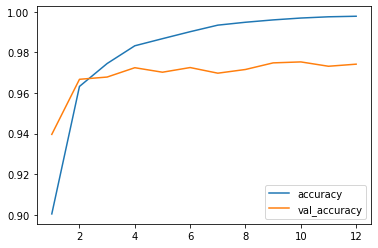

In [14]:
epochs = range(1,len(modelfit.history['accuracy'])+1)
plt.plot(epochs, modelfit.history['accuracy'], label ="accuracy")
plt.plot(epochs, modelfit.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

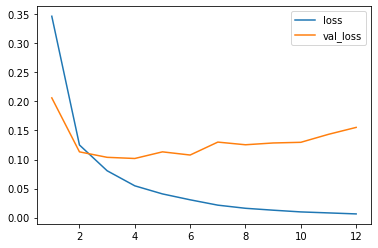

In [15]:
plt.plot(epochs, modelfit.history['loss'], label ="loss")
plt.plot(epochs, modelfit.history['val_loss'], label = 'val_loss')
plt.legend()

### Prediction

In [16]:
predictions = model.predict(test)
predictarr = np.argmax(predictions, axis = 1)

In [17]:
predictarr

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

### Submit

In [18]:
submit = pd.read_csv('sample_submission.csv')
submit['Label']= predictarr
submit.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [19]:
submit.to_csv('submission.csv', index=False)